# **PRÀCTICA ÀLGEBRA**
- Biel Fernandez Herencia

- Izan Perez Sanchez

- Edgar Saez Lopez

In [2]:
!pip install kagglehub numpy pandas matplotlib plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Realitzem la instal·lació de les llibreries, per tal que el programa s’executi correctament. La majoria d’aquestes no venen instal·lades de fàbrica, així, només cal executar aquest quadre per descarregar-les.

In [1]:
import kagglehub

path = kagglehub.dataset_download("rajmehra03/movielens100k")


Aquí importem tot el dataset del kagglehub. Les dades es guarden en una ruta local que emmagatzemem a la variable "path" per poder accedir-hi posteriorment.

In [2]:
import os
os.listdir(path)

['links.csv', 'movies.csv', 'ratings.csv', 'tags.csv', 'u.data']

Llistem els fitxers descarregats per després crear una estructura de dades on emmagatzarem les dades importants.

In [3]:
import pandas as pd

df = pd.read_csv(path+"/ratings.csv")
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [14]:
pd.unique(df['movieId']).shape

(9066,)

In [4]:
df = df.iloc[:, :3]

df = pd.pivot_table(df, values="rating", index="userId",
                       columns="movieId")

df

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Importem pandas, que es la llibreria per gestionar els datasets i guardem la taula dels “ratings” a una variable.
Imprimim les primeres parts de la taula per verificar que tot ha funcionat bé.

In [16]:
df = df.iloc[12000:13000, :3]

df = pd.pivot_table(df, values="rating", index="userId",
                       columns="movieId")

df

KeyError: 'rating'

Ara redefinim la variable anterior, primer agafem només la part del dataset que hem d’analitzar (del 12000 al 12999) i només agafem les tres primeres columnes de la taula (ja que no necessitem el “timestamp”).
A continuació utilitzem el “pivot table” del pandas per crear la matriu.
Imprimim la matriu resultant per veure que tot ha quedat bé.
Les dimensions de la matriu son 9 x 729 ja que hi ha només 9 usuaris diferents en el rang de 12000 a 12999. Cada fila representa un usuari, i les columnes representen les diferents pel·lícules que han rebut valoracions. Només tenim 729 pel·lícula ja que els 9 usuaris només han valorat 729 pel·lícules. 

In [10]:
df = df.fillna(0)
df

movieId,1,2,6,7,10,16,20,21,25,32,...,79132,80463,81054,81591,81786,81834,82459,88125,88129,97673
userId,,,,,,,,,,,,,,,,,,,,,
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,4.0,0.0,3.5,0.0,3.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,3.5,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,...,4.5,0.0,0.0,0.0,0.0,4.5,0.0,4.5,4.0,4.5
79,2.0,2.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,2.0,4.0,4.0,3.0,5.0,1.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,4.0,2.5,4.0,0.0,3.5,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Per poder treballar amb la matriu canviem els valors que no estan definits per zeros amb la comanda fillna(0).

In [11]:
import numpy as np
from numpy.linalg import svd

U, sigma, Vt = svd(df, full_matrices=False)

# construim la matriu diagonal perque la funcion svd el valor sigma es un array amb els valors singulars
Sigma = np.diag(sigma)


Importem la llibreria numpy per realitzar la descomposició en valors singulars de la matriu (SVD). Fet això, obtenim les següents estructures producte de la descomposició:
- U: matriu 9x9 que relaciona els usuaris amb els temes
- sigma: vector de valors singulars 
- Vt: matriu 9x729 que relaciona les pel·lícules amb els temes

Posteriorment, construim Sigma, que és la matriu diagonal formada pels valor singulars del vector sigma.

Aquestes matrius de la descomposició son necessaries per després realitzar la reducció de dimensionalitat.

In [12]:
# vector valors singulars
sigma

array([78.28443425, 53.36692855, 50.3734961 , 39.47853474, 23.05393457,
       22.21283523, 18.48505578, 17.14184453, 16.21081143])

Observem que els primers valors singulars són més grans que la resta. Això ens indica que la major part de la informació es troba en les primeres components. Aquests valors capturen l'estructura principal i els patrons més importants dels gustos dels usuaris, mentre que els valors més petits representen detalls secundaris o soroll. Per aquest motiu, podem reduir la dimensionalitat de la matriu mantenint l'essència de les dades originals.

In [13]:
print(U.shape)
print(Sigma.shape)
print(Vt.shape)

(9, 9)
(9, 9)
(9, 729)


Aquí tenim impreses les dimensions de les tres matrius.
 - **U**: Té dimensió 9 x 9, té 9 files que representen els 9 usuaris i les 9 columnes els relacionen amb els 9 valors singulars (temes importants)
 - **Sigma**: Té dimensió 9x9, és així ja que es una matriu diagonal amb els valors singulars
 - **Vt**: Té dimensió 9x729, te com a files els 9 valors singulars (temes) i com a columnes les 729 pelicules

A continuació veurem com podem utilitzar aquesta descomposició per fer una reducció de dimensionalitat (a dimensió 5 per exemple) i veurem com el SVD crea la millor aproximació de la matriu per rang 5:


In [12]:
k = 7

U_k = U[:, :k]
Sigma_k = np.diag(sigma[:k])
Vt_k = Vt[:k, :]

pred_centrada = np.dot(np.dot(U_k, Sigma_k), Vt_k)
pred_centrada

array([[ 2.15867265e-01,  3.00691098e-01, -1.09608306e-01, ...,
         6.53631600e-02,  5.81005867e-02,  6.53631600e-02],
       [ 3.37530201e-01,  5.91716051e-01,  2.03328297e-01, ...,
        -2.42720549e-02, -2.15751599e-02, -2.42720549e-02],
       [ 4.00368203e+00,  6.24694949e-03,  3.50157708e+00, ...,
        -4.84339653e-05, -4.30524136e-05, -4.84339653e-05],
       ...,
       [-5.31263951e-03, -8.18561114e-03,  2.76424608e-04, ...,
        -7.91451009e-04, -7.03512008e-04, -7.91451009e-04],
       [ 1.94039575e-02,  3.13996801e-02,  3.62188002e-03, ...,
         1.32746919e-03,  1.17997261e-03,  1.32746919e-03],
       [ 5.69611169e-03,  9.38265385e-03,  5.00157231e+00, ...,
         2.17853055e-04,  1.93647160e-04,  2.17853055e-04]],
      shape=(9, 729))

In [14]:
# Rang
rang_matriu_contruida = np.linalg.matrix_rank(pred_centrada)
rang_matriu_contruida

np.int64(7)

El rang de la matriu de prediccions es de 7 ja que hem reduït les dimensions a 7. 

Amb aquesta matriu podríem fer el sistema de recomanació, pero el que hem decidit realitzar es crear una nova funció que ens dona les coordenades dels diferents usuaris i películes i fer el sistema de recomanacions en base a la seva proximitat.


### Redució de dimensionalitat a 2 i mostra el gràfic 2D

El primer que farem es agafar els noms de le pel·ícules per després utilitzarles als gràfics

In [14]:
# coger los nombres de las pelis
df_movie_name = pd.read_csv(path+"/movies.csv")
df_movie_name = df_movie_name.iloc[:, :2]

df_movie_name.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [95]:
df_movie_name

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9120,162672,Mohenjo Daro (2016)
9121,163056,Shin Godzilla (2016)
9122,163949,The Beatles: Eight Days a Week - The Touring Y...
9123,164977,The Gay Desperado (1936)


In [15]:
df.columns

Index([    1,     2,     6,     7,    10,    16,    20,    21,    25,    32,
       ...
       79132, 80463, 81054, 81591, 81786, 81834, 82459, 88125, 88129, 97673],
      dtype='int64', name='movieId', length=729)

In [16]:
# Convertimos el DataFrame de nombres en un diccionario para que sea rápido buscar
# {movieId: titulo}
dict_nombres = dict(zip(df_movie_name['movieId'], df_movie_name['title']))

# Creamos la lista de nombres siguiendo el orden de las columnas de la matriz df
# Usamos .get() por si algún ID de la matriz no está en el CSV (evita errores)
nombres_para_grafico = [dict_nombres.get(int(col), f"ID Desconocido: {col}") for col in df.columns]



In [15]:
# Reducion de la dimensionalidad
# k es igual al nombre de components al que volem reduir
def reducion_dim(k, U, sigma, Vt):
    U_k = U[:, :k]
    S_k = np.diag(sigma[:k])
    Vt_k = Vt[:k, :]

    usuarios_kd = np.dot(U_k, S_k)
    pelis_kd = np.dot(Vt_k.T, S_k)

    return usuarios_kd, pelis_kd


Aquesta funció que hem creat, funciona fent que donada una dimensió k i les matrius d'una SVD, ens retorna la reducció de dimensió. 

Com la utilitzarem per mostrar els susuaris i les pelicules retornem els vectors amb les coordenades dels diferents usuaris i pelicules al subespai de dimensió k.

In [16]:
usuarios_2d, pelis_2d = reducion_dim(2, U, sigma, Vt)

Un cop ja tenim aquestes coordenades, les utilitzem per plasmar-les a un gràfic en 2 dimensions.

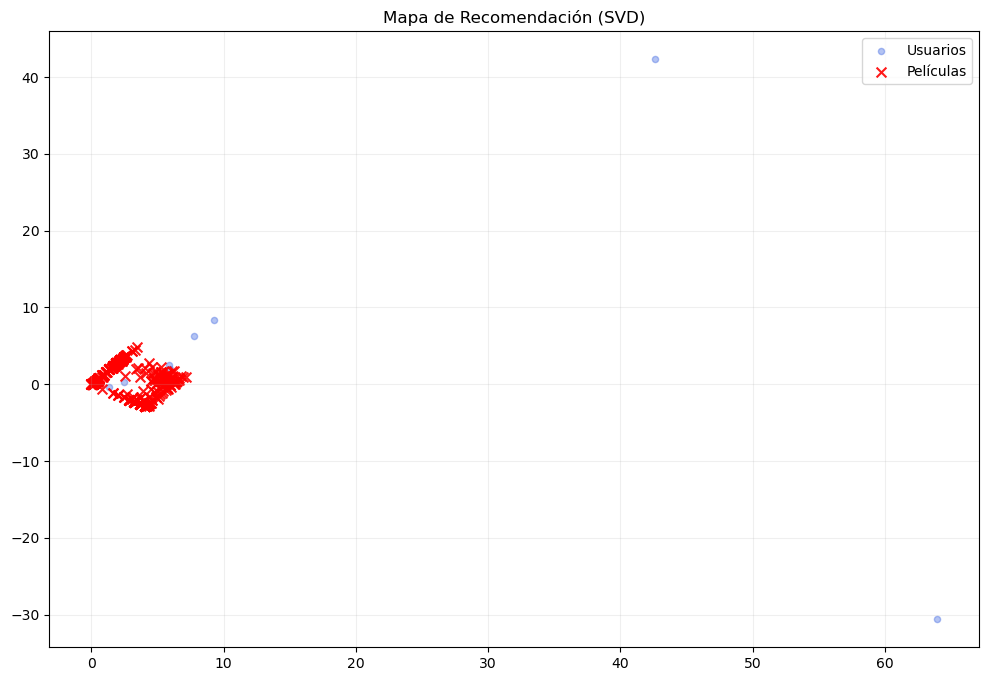

In [19]:
import matplotlib.pyplot as plt

# Asumiendo que:
# u_red son tus usuarios (filas de U reducidas)
# p_red son tus pelis (filas de V o columnas de Vt reducidas)

plt.figure(figsize=(12, 8))

# 1. Pintamos los usuarios
plt.scatter(usuarios_2d[:, 0], usuarios_2d[:, 1], 
            c='royalblue', alpha=0.4, label='Usuarios', s=20)

# 2. Pintamos las películas
plt.scatter(pelis_2d[:, 0], pelis_2d[:, 1], 
            c='red', alpha=0.9, label='Películas', marker='x', s=50)


plt.title("Mapa de Recomendación (SVD)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

Com es pot observar al gràfic, hi ha una alta concentració de pel·lícules i usuaris al voltant de l'origen de coordenades (0,0), mentre que un parell d'usuaris apareixen extremadament allunyats (outliers).

Aquests punts llunyans, en tenir una magnitud tan gran, forcen que l'escala del gràfic s'expandeixi i comprimeixen visualment la resta de dades, dificultant-ne la interpretació. Per solucionar-ho, al gràfic següent reajustarem els límits dels eixos (zoom) per centrar-nos en la zona on hi ha la majoria de la població i així poder apreciar millor les agrupacions.

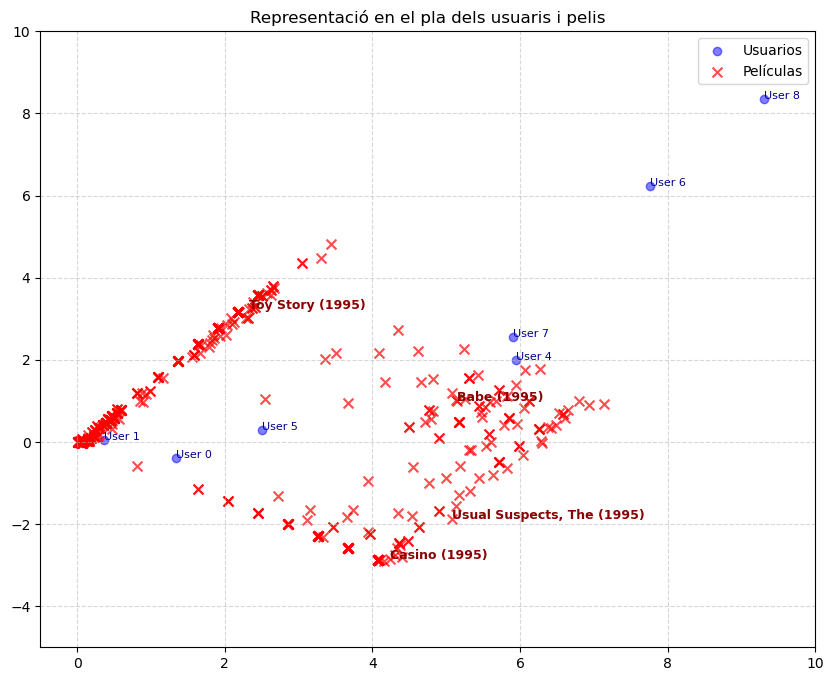

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# 1. Pintamos los usuarios

plt.scatter(usuarios_2d[:, 0], usuarios_2d[:, 1], c='blue', label='Usuarios', alpha=0.5)

# etiquetar todos los users
for i, txt in enumerate(df.index.tolist()): 
    plt.annotate(f"User {i}", (usuarios_2d[i, 0], usuarios_2d[i, 1]), fontsize=8, color='darkblue')


# 2. Pintamos las películas
plt.scatter(pelis_2d[:, 0], pelis_2d[:, 1], 
            c='red', alpha=0.7, label='Películas', marker='x', s=50)


# 3. Etiquetar algunas peliculas
n_pelis_a_etiquetar = 20
for i in range(0, n_pelis_a_etiquetar, 5):
    plt.annotate(nombres_para_grafico[i], (pelis_2d[i, 0], pelis_2d[i, 1]), fontsize=9, fontweight='bold', color='darkred')



plt.xlim(-0.5, 10) 
plt.ylim(-5, 10)


plt.title("Representació en el pla dels usuaris i pelis")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

#### **Anàlisi del gràfic 2D**
Després d'aplicar les millores per estandaritzar les dades (centrar la mitjana dels usuaris i re-escalar els eixos) el gràfic ens ha quedat més llegible.

El gràfic presenta una projecció en 2D on, mitjançant la reducció de dimensionalitat (SVD), els eixos representen factors latents (com gèneres o estils) que agrupen els elements per afinitat.

Interpretació visual:

- El Centre (0,0): En haver centrat les dades, l'origen representa l'usuari/pel·lícula "mitjà" o neutre. Allunyar-se del centre implica tenir gustos o característiques molt definides.

- Proximitat: La coincidència en el mateix quadrant o la proximitat geomètrica indica una alta correlació de gustos. Si un usuari (blau) cau a prop d'una pel·lícula (vermell), el model prediu que la valorarà positivament (per sobre de la seva mitjana).


Com exemple veiem que els usuaris 7 i 4 están molt aprop, aixó (com veurem més endavant a la recomanació de películes) ens indica que tenen afinitats similars.

### Redució de dimensionalitat a 3 i mostra de manera interactiva 3D

**Gràfic 3d**

Per realitzar el gràfic en 3D el primer ha sigut reduir la dimensionalitat a 3 per poder representar-ho. Per fer-ho en python hem utilitzat la llibreria plotly. Hi ha principalment 3 parts: Els add_trace que basicament serveixen per dibuixar les dades, tenim dos el dels usuaris i el de las películas, cadascun extreu les dades del conjunt corresponent i els mostra amb un distintiu diferent. L'altre part és l'update layout que indica com ha de ser les mides del grafic.


In [22]:
import plotly.express as px
import plotly.graph_objects as go

In [23]:
U, sigma, Vt = np.linalg.svd(df, full_matrices=False)

usuarios_3d, pelis_3d = reducion_dim(3, U, sigma, Vt)

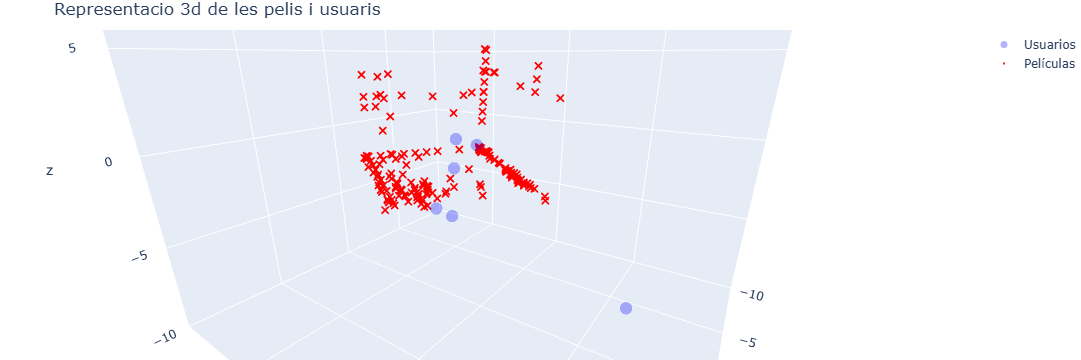

In [43]:
fig = go.Figure()

# Usuarios (Puntos azules)
fig.add_trace(go.Scatter3d(
    x=usuarios_3d[:, 0], y=usuarios_3d[:, 1], z=usuarios_3d[:, 2],
    mode='markers', # Quitamos '+text' de aquí
    marker=dict(size=7, color='blue', opacity=0.3),
    name='Usuarios',
    hovertext=[f"Usuario {i}" for i in range(len(usuarios_3d))], # Info al pasar el ratón
    hoverinfo='text'
))

# Películas (Cruces rojas)
fig.add_trace(go.Scatter3d(
    x=pelis_3d[:, 0], y=pelis_3d[:, 1], z=pelis_3d[:, 2],
    mode='markers', # Solo puntos/cruces, sin texto fijo
    marker=dict(size=2, color='red', symbol='x'),
    name='Películas',
    hovertext=nombres_para_grafico, # Títulos de las pelis solo en el hover
    hoverinfo='text'
))

# Ajuste estético para que el centro sea el 0
fig.update_layout(
    title="Representacio 3d de les pelis i usuaris",
    scene=dict(
        xaxis=dict(range=[-10, 10]),
        yaxis=dict(range=[-10, 10]),
        zaxis=dict(range=[-10, 10])
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

### Sistema recomendacion

Per al sistema de recomenació hem creat una funció que donada un número de usuari com a parametre mostra per pantalla quines son les 3 pelis no vistes recomenadas.

Això ho fa calculant la norma euclidiana entre l'usuari i totes les pelicules no vistes. I després seleciona las tres més properes que corresponen a quin es l'ement més proper. Tots aquests càlculs els fem amb la SVD reduida a dimensio 2

In [53]:
def recomend_for_user(idx_usuario):
    
    # 1. Usamos La funcion para obtener las coordenadas en 2D
    usuarios_2d, pelis_2d = reducion_dim(2, U, sigma, Vt)
    
    # 2. Elegimos usuario
    coord_usuario = usuarios_2d[idx_usuario]  # El punto (x,y) del usuario
    puntuaciones_reales = df.iloc[idx_usuario].values
    
    # 3. Calculamos DISTANCIAS (Cercanía geométrica)
    recomendaciones = []
    
    print(f"Buscando películas cercanas al Usuario {idx_usuario}...")
    
    for i in range(len(pelis_2d)):
        # Solo si NO la ha visto (en tu df original los 0 eran NaN/no vistas)
        if puntuaciones_reales[i] == 0:
            coord_peli = pelis_2d[i] # El punto (x,y) de la peli
            
            # Distancia Euclídea (Pitágoras)
            distancia = np.linalg.norm(coord_usuario - coord_peli)
            
            nombre_peli = nombres_para_grafico[i]
            recomendaciones.append((distancia, nombre_peli))
    
    # 4. Ordenamos de MENOR a MAYOR distancia (los que están más cerca)
    recomendaciones.sort(key=lambda x: x[0]) 
    top_3 = recomendaciones[:3]
    
    print("Las 3 películas más cercanas (no vistas) son:")
    for dist, nombre in top_3:
        print(f"  - {nombre} (Distancia: {dist:.4f})")
    print()

##### Si ens fixem en el grafic 3d l'usuari 4 y 7 estan propers, per tant te que recomanar peliculas similars tal i com es veu reflexat en les recomenacions otorgades pel sistema


In [54]:
recomend_for_user(4)
recomend_for_user(7)

Buscando películas cercanas al Usuario 4...
Las 3 películas más cercanas (no vistas) son:
  - Terminator, The (1984) (Distancia: 0.2758)
  - Taxi Driver (1976) (Distancia: 0.6279)
  - Monty Python and the Holy Grail (1975) (Distancia: 0.7501)

Buscando películas cercanas al Usuario 7...
Las 3 películas más cercanas (no vistas) son:
  - Monty Python and the Holy Grail (1975) (Distancia: 0.7229)
  - Terminator, The (1984) (Distancia: 0.8385)
  - Star Wars: Episode VI - Return of the Jedi (1983) (Distancia: 0.8725)



In [80]:
def recommend_movie_by_movie(index_movie):
    
    usuarios_2d, pelis_2d = reducion_dim(2, U, sigma, Vt)

    coord_peli = pelis_2d[index_movie]  # El punto (x,y) de la peli vista
    
    # 3. Calculamos DISTANCIAS (Cercanía geométrica)
    recomendaciones = []
    
    for i in range(len(pelis_2d)):
        if i != index_movie: # mira sino es la peli que hemos visto
            coord_peli_recomendacion = pelis_2d[i] # El punto (x,y) de la peli recomendada
            
            # Distancia Euclídea (Pitágoras)
            distancia = np.linalg.norm(coord_peli - coord_peli_recomendacion)
            
            nombre_peli = nombres_para_grafico[i]
            recomendaciones.append((distancia, nombre_peli))
    
    # 4. Ordenamos de MENOR a MAYOR distancia (los que están más cerca)
    recomendaciones.sort(key=lambda x: x[0]) 
    top_3 = recomendaciones[:3]
    
    print(f"Las 3 películas recomendadas si has visto {nombres_para_grafico[index_movie]}:")
    for dist, nombre in top_3:
        print(f"  - {nombre} (Distancia: {dist:.4f})")
    print()

### Funció de recomanació de pelicula basant-se en una peli vista
Funciona igual que la dels usuaris però ara la distància euclidiana la calculem respecte a la posició de la pel·lícula vista per l'usuari i agafem les 3 que estan més a prop

In [116]:
recommend_movie_by_movie(0)

Las 3 películas recomendadas si has visto Toy Story (1995):
  - Indiana Jones and the Last Crusade (1989) (Distancia: 0.0423)
  - Mad Max (1979) (Distancia: 0.0423)
  - Monsters, Inc. (2001) (Distancia: 0.0846)

